In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [3]:
# Set seaborn style for better visuals
sns.set_style("whitegrid")

# Read the dataset
data = pd.read_csv("pr_data_04252025.csv")

In [4]:
# 1. Dataset Overview
print("=== Dataset Overview ===")
print("Shape:", data.shape)
print("\nInfo:")
data.info()
print("\nSummary Statistics:")
display(data.describe())
print("\nMissing Values:")
display(data.isnull().sum())

=== Dataset Overview ===
Shape: (500, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   additions                  500 non-null    int64 
 1   deletions                  500 non-null    int64 
 2   changed_files              500 non-null    int64 
 3   comments                   500 non-null    int64 
 4   commits                    500 non-null    int64 
 5   author_account_age_days    500 non-null    int64 
 6   author_public_repos        500 non-null    int64 
 7   author_merged_prs          500 non-null    int64 
 8   has_milestone              500 non-null    bool  
 9   requested_reviewers_count  500 non-null    int64 
 10  title_length               500 non-null    int64 
 11  description_length         500 non-null    int64 
 12  changed_files_list         498 non-null    object
 13  pr_age_days     

,additions,deletions,changed_files,comments,commits,author_account_age_days,author_public_repos,author_merged_prs,requested_reviewers_count,title_length,description_length,pr_age_days
count,5.000000e+02,5.000000e+02,500.000000,500.00000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,6.958860e+03,9.832618e+03,34.650000,2.28600,3.076000,3918.158000,77.150000,7.292271e+04,0.118000,44.384000,777.346000,10.592000
std,1.093300e+05,1.416360e+05,363.908949,3.53967,5.156686,1526.561672,90.127651,1.140376e+06,0.415236,19.369122,2784.175625,25.116034
min,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,16.000000,0.000000,0.000000e+00,0.000000,3.000000,1.000000,-1.000000
25%,3.000000e+00,1.000000e+00,1.000000,0.00000,1.000000,3007.000000,17.500000,7.100000e+01,0.000000,30.000000,100.250000,0.000000
50%,1.200000e+01,5.000000e+00,2.000000,1.00000,1.000000,4408.000000,68.000000,5.010000e+02,0.000000,43.000000,367.000000,0.000000
75%,8.325000e+01,2.925000e+01,4.250000,3.00000,3.000000,4861.000000,91.000000,1.129000e+03,0.000000,56.000000,950.750000,7.000000
max,2.261619e+06,2.365750e+06,6572.000000,31.00000,30.000000,6010.000000,1292.000000,1.804974e+07,3.000000,179.000000,59997.000000,165.000000



Missing Values:


additions                    0
deletions                    0
changed_files                0
comments                     0
commits                      0
author_account_age_days      0
author_public_repos          0
author_merged_prs            0
has_milestone                0
requested_reviewers_count    0
title_length                 0
description_length           0
changed_files_list           2
pr_age_days                  0
merged                       0
dtype: int64


=== Target Variable Distribution (merged) ===


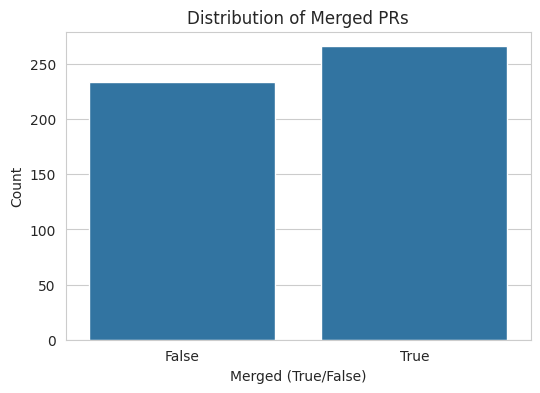

Proportion of Merged PRs:


merged
True     0.532
False    0.468
Name: proportion, dtype: float64

In [5]:
# 2. Target Variable Distribution
print("\n=== Target Variable Distribution (merged) ===")
plt.figure(figsize=(6, 4))
sns.countplot(x="merged", data=data)
plt.title("Distribution of Merged PRs")
plt.xlabel("Merged (True/False)")
plt.ylabel("Count")
plt.show()
print("Proportion of Merged PRs:")
display(data["merged"].value_counts(normalize=True))


=== Numeric Feature Distributions ===


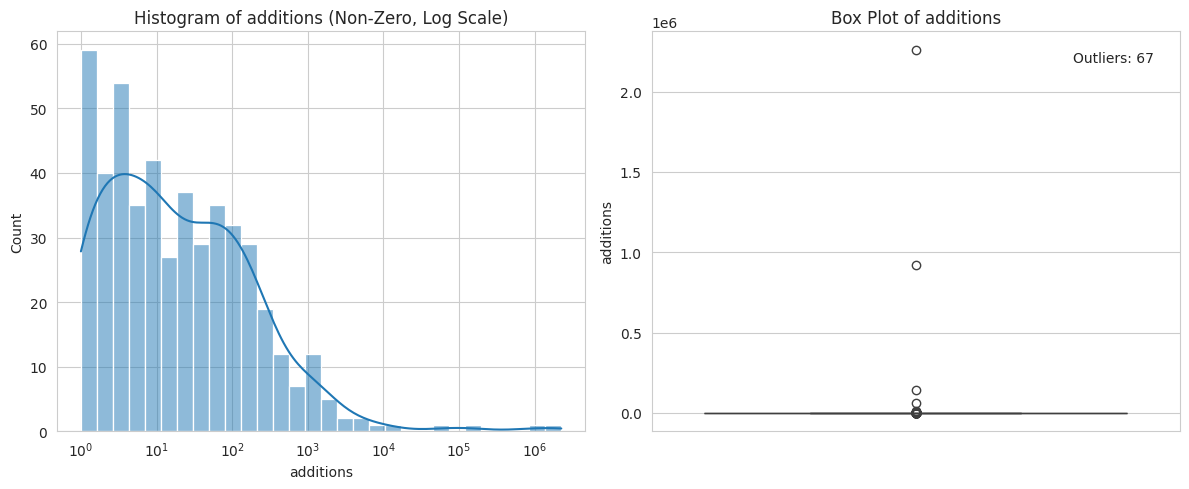


Summary for additions:
Mean: 6958.86
Median: 12.00
Zero Count: 16/500
Outliers (> Q3 + 1.5*IQR): 67


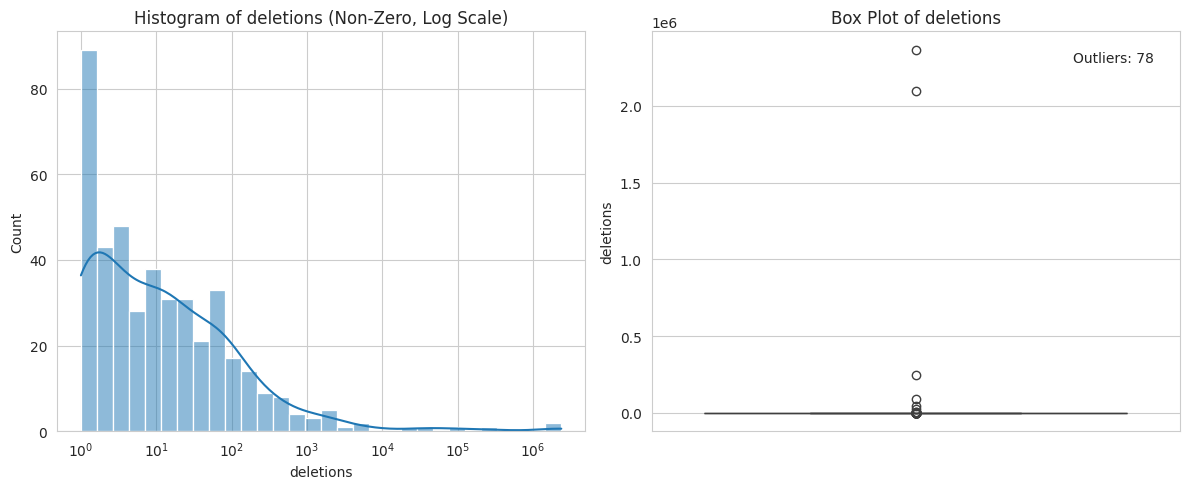


Summary for deletions:
Mean: 9832.62
Median: 5.00
Zero Count: 69/500
Outliers (> Q3 + 1.5*IQR): 78


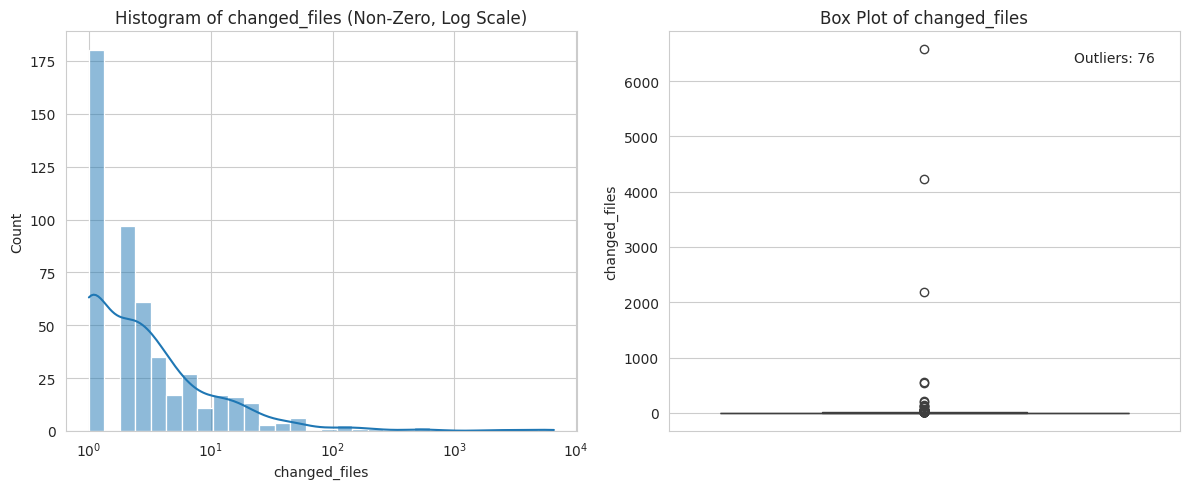


Summary for changed_files:
Mean: 34.65
Median: 2.00
Zero Count: 2/500
Outliers (> Q3 + 1.5*IQR): 76


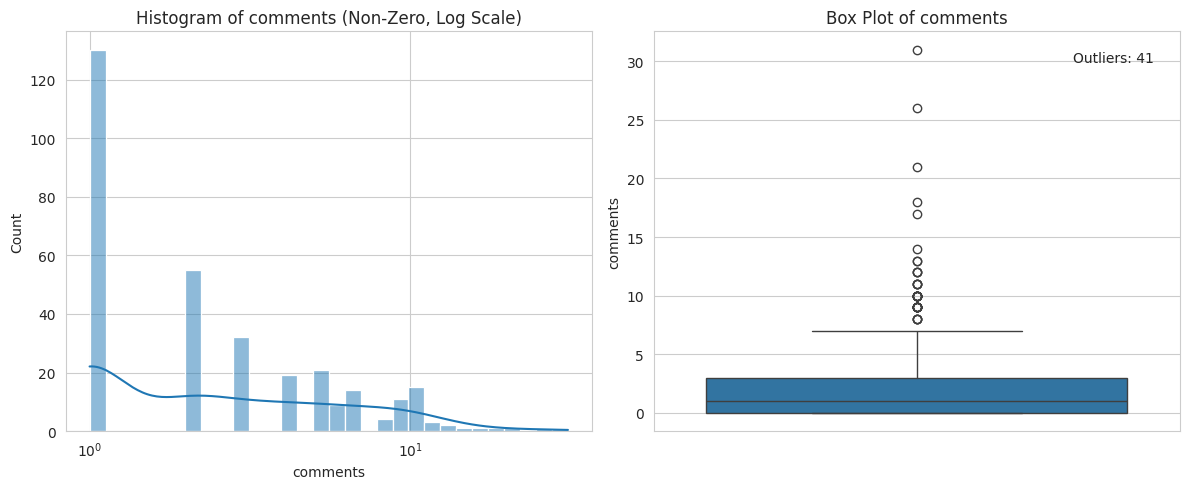


Summary for comments:
Mean: 2.29
Median: 1.00
Zero Count: 179/500
Outliers (> Q3 + 1.5*IQR): 41


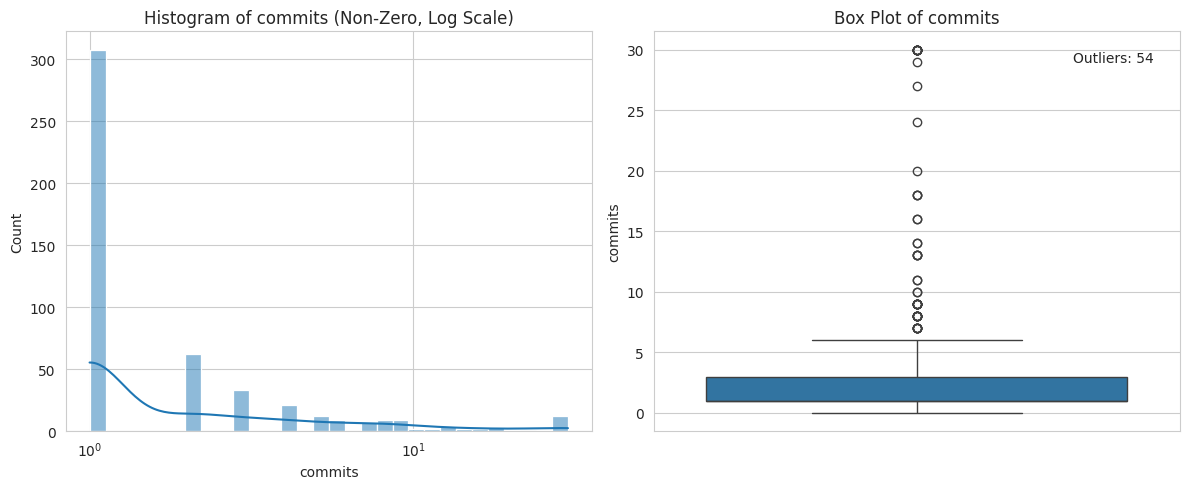


Summary for commits:
Mean: 3.08
Median: 1.00
Zero Count: 2/500
Outliers (> Q3 + 1.5*IQR): 54


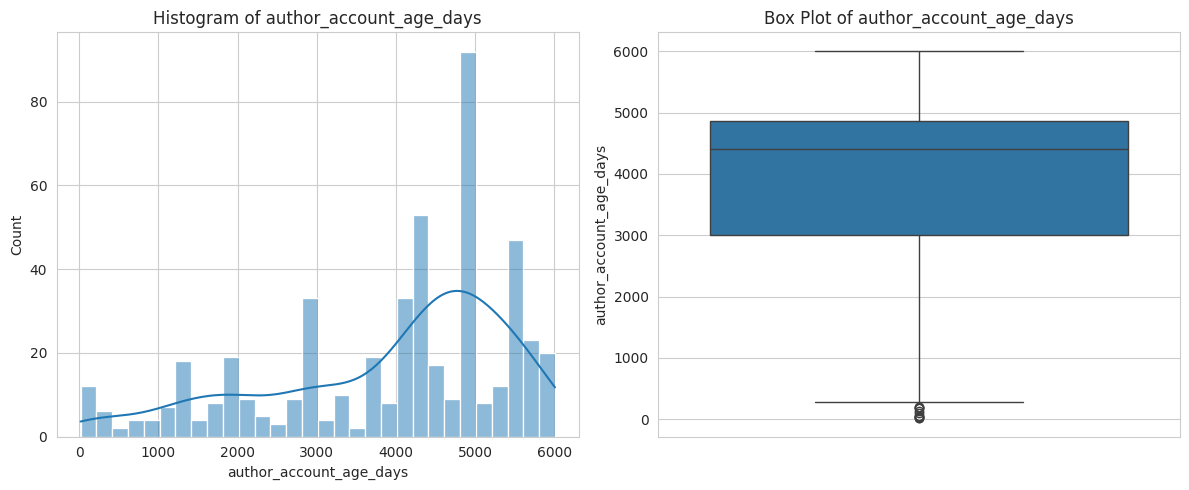


Summary for author_account_age_days:
Mean: 3918.16
Median: 4408.00
Zero Count: 0/500
Outliers (> Q3 + 1.5*IQR): 0


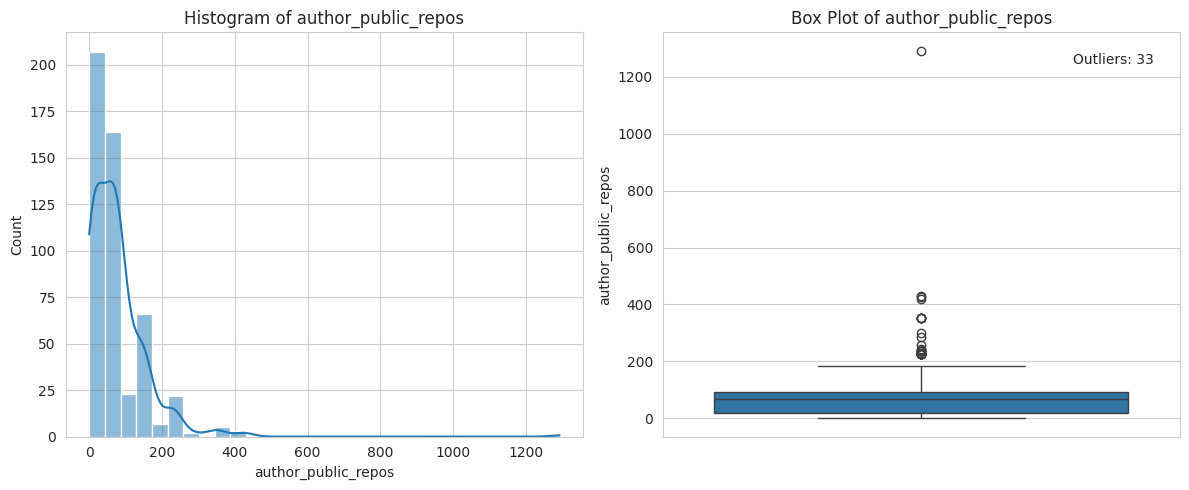


Summary for author_public_repos:
Mean: 77.15
Median: 68.00
Zero Count: 2/500
Outliers (> Q3 + 1.5*IQR): 33


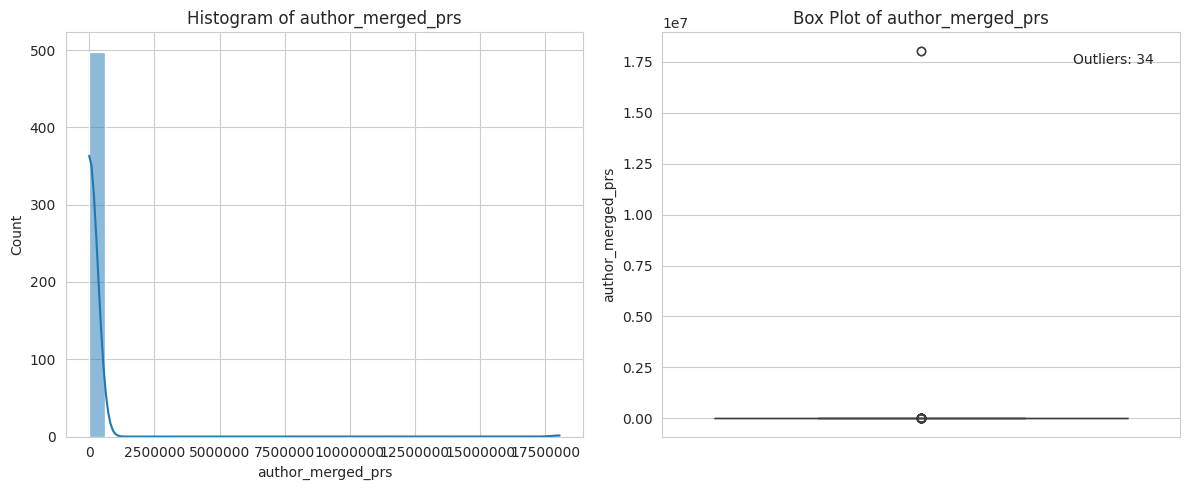


Summary for author_merged_prs:
Mean: 72922.71
Median: 501.00
Zero Count: 24/500
Outliers (> Q3 + 1.5*IQR): 34


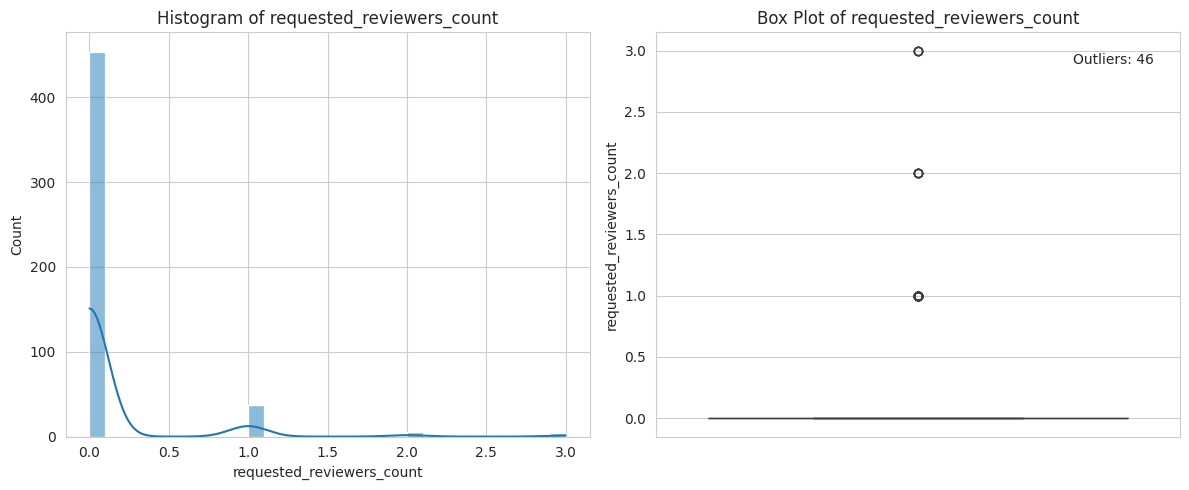


Summary for requested_reviewers_count:
Mean: 0.12
Median: 0.00
Zero Count: 454/500
Outliers (> Q3 + 1.5*IQR): 46


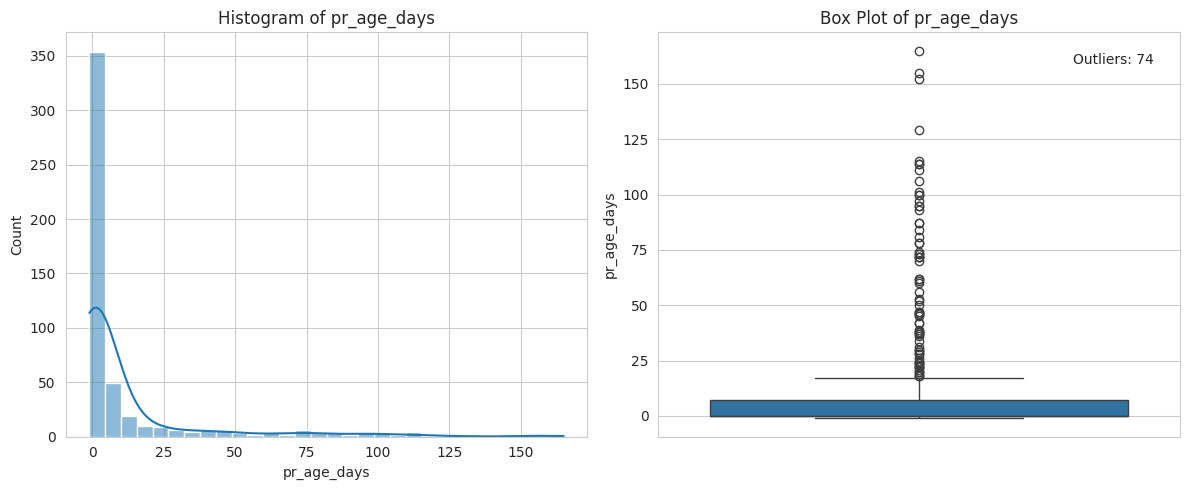


Summary for pr_age_days:
Mean: 10.59
Median: 0.00
Zero Count: 257/500
Outliers (> Q3 + 1.5*IQR): 74


In [8]:
# 3. Numeric Feature Distributions
numeric_cols = [
    "additions", "deletions", "changed_files", "comments", "commits",
    "author_account_age_days", "author_public_repos", "author_merged_prs",
    "requested_reviewers_count", "pr_age_days"
]
print("\n=== Numeric Feature Distributions ===")
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram with log scale for skewed features
    plt.subplot(1, 2, 1)
    if col in ["additions", "deletions", "comments", "commits", "changed_files"]:
        non_zero_data = data[data[col] > 0][col]
        if not non_zero_data.empty:
            sns.histplot(non_zero_data, bins=30, kde=True, log_scale=True)
            plt.title(f"Histogram of {col} (Non-Zero, Log Scale)")
            # Format x-axis for log scale
            plt.gca().xaxis.set_major_formatter(ticker.LogFormatterMathtext())
        else:
            sns.histplot(data[col], bins=30, kde=True)
            plt.title(f"Histogram of {col} (All Zeros)")
            # Format x-axis for linear scale
            plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
            plt.gca().xaxis.get_major_formatter().set_scientific(False)
    else:
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f"Histogram of {col}")
        # Format x-axis for linear scale
        plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
        plt.gca().xaxis.get_major_formatter().set_scientific(False)
    plt.xlabel(col)
    plt.ylabel("Count")
    
    # Box plot with outlier annotation
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f"Box Plot of {col}")
    
    # Annotate outliers
    q1, q3 = data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    outliers = data[data[col] > upper_bound][col]
    if not outliers.empty:
        plt.text(0.95, 0.95, f"Outliers: {len(outliers)}", 
                 transform=plt.gca().transAxes, ha='right', va='top')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary for context
    print(f"\nSummary for {col}:")
    print(f"Mean: {data[col].mean():.2f}")
    print(f"Median: {data[col].median():.2f}")
    print(f"Zero Count: {(data[col] == 0).sum()}/{len(data)}")
    print(f"Outliers (> Q3 + 1.5*IQR): {len(outliers)}")


=== Boolean Feature Distributions ===


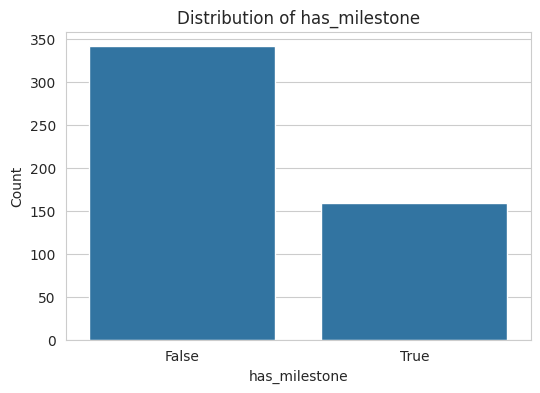

Proportion of has_milestone:


has_milestone
False    0.682
True     0.318
Name: proportion, dtype: float64

In [9]:
# 4. Categorical/Boolean Feature Distributions
boolean_cols = ["has_milestone"]
print("\n=== Boolean Feature Distributions ===")
for col in boolean_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print(f"Proportion of {col}:")
    display(data[col].value_counts(normalize=True))

In [14]:
# 5. Feature-Target Relationships
print("\n=== Feature-Target Relationships ===")
for col in numeric_cols:
    print(f"\nFeature: {col}")
    # Grouped statistics by merged
    grouped_stats = data.groupby("merged")[col].agg(['count', 'mean', 'median', 'std', 
                                                    lambda x: x.quantile(0.25), 
                                                    lambda x: x.quantile(0.75)])
    grouped_stats.columns = ['Count', 'Mean', 'Median', 'Std', '25th Percentile', '75th Percentile']
    print("Summary Statistics by Merged Status:")
    display(grouped_stats)
    
    # Non-zero count by merged
    non_zero_counts = data[data[col] > 0].groupby("merged")[col].count()
    print("Non-Zero Counts by Merged Status:")
    display(non_zero_counts.rename("Non-Zero Count"))


=== Feature-Target Relationships ===

Feature: additions
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,14707.500000,8.5,159641.519220,2.0,74.75
True,266,142.387218,18.5,474.059789,4.0,89.00


Non-Zero Counts by Merged Status:


merged
False    221
True     263
Name: Non-Zero Count, dtype: int64


Feature: deletions
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,20927.991453,3.0,206712.985028,1.0,27.75
True,266,72.026316,6.0,274.448227,1.0,30.75


Non-Zero Counts by Merged Status:


merged
False    198
True     233
Name: Non-Zero Count, dtype: int64


Feature: changed_files
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,67.594017,2.0,530.510356,1.0,4.0
True,266,5.669173,3.0,10.506222,1.0,5.0


Non-Zero Counts by Merged Status:


merged
False    232
True     266
Name: Non-Zero Count, dtype: int64


Feature: comments
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,2.508547,1.0,3.316290,1.0,3.0
True,266,2.090226,1.0,3.720334,0.0,2.0


Non-Zero Counts by Merged Status:


merged
False    181
True     140
Name: Non-Zero Count, dtype: int64


Feature: commits
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,2.880342,1.0,5.618276,1.0,2.0
True,266,3.248120,1.0,4.717540,1.0,3.0


Non-Zero Counts by Merged Status:


merged
False    232
True     266
Name: Non-Zero Count, dtype: int64


Feature: author_account_age_days
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,3359.769231,3725.0,1696.084979,1924.0,4861.0
True,266,4409.372180,4578.0,1158.151660,4098.0,5411.0


Non-Zero Counts by Merged Status:


merged
False    234
True     266
Name: Non-Zero Count, dtype: int64


Feature: author_public_repos
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,77.910256,64.0,79.701996,19.25,91.0
True,266,76.481203,72.0,98.536621,7.00,84.0


Non-Zero Counts by Merged Status:


merged
False    232
True     266
Name: Non-Zero Count, dtype: int64


Feature: author_merged_prs
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,154905.675214,135.5,1.665056e+06,16.75,800.0
True,266,802.364662,800.0,7.463235e+02,198.00,1129.0


Non-Zero Counts by Merged Status:


merged
False    212
True     264
Name: Non-Zero Count, dtype: int64


Feature: requested_reviewers_count
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,0.149573,0.0,0.471346,0.0,0.0
True,266,0.090226,0.0,0.357320,0.0,0.0


Non-Zero Counts by Merged Status:


merged
False    27
True     19
Name: Non-Zero Count, dtype: int64


Feature: pr_age_days
Summary Statistics by Merged Status:


,Count,Mean,Median,Std,25th Percentile,75th Percentile
merged,,,,,,
False,234,17.376068,2.0,32.931513,0.0,14.0
True,266,4.624060,0.0,12.566563,0.0,2.0


Non-Zero Counts by Merged Status:


merged
False    149
True      88
Name: Non-Zero Count, dtype: int64

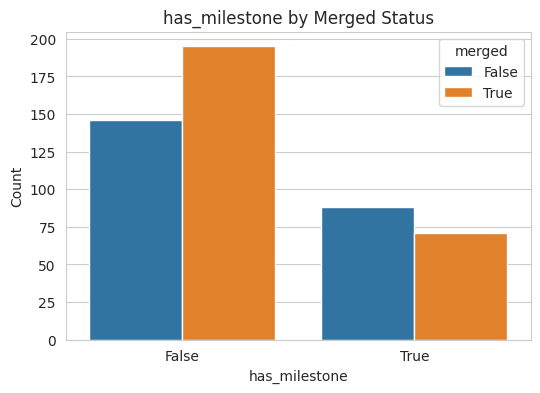

In [11]:
for col in boolean_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="merged", data=data)
    plt.title(f"{col} by Merged Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

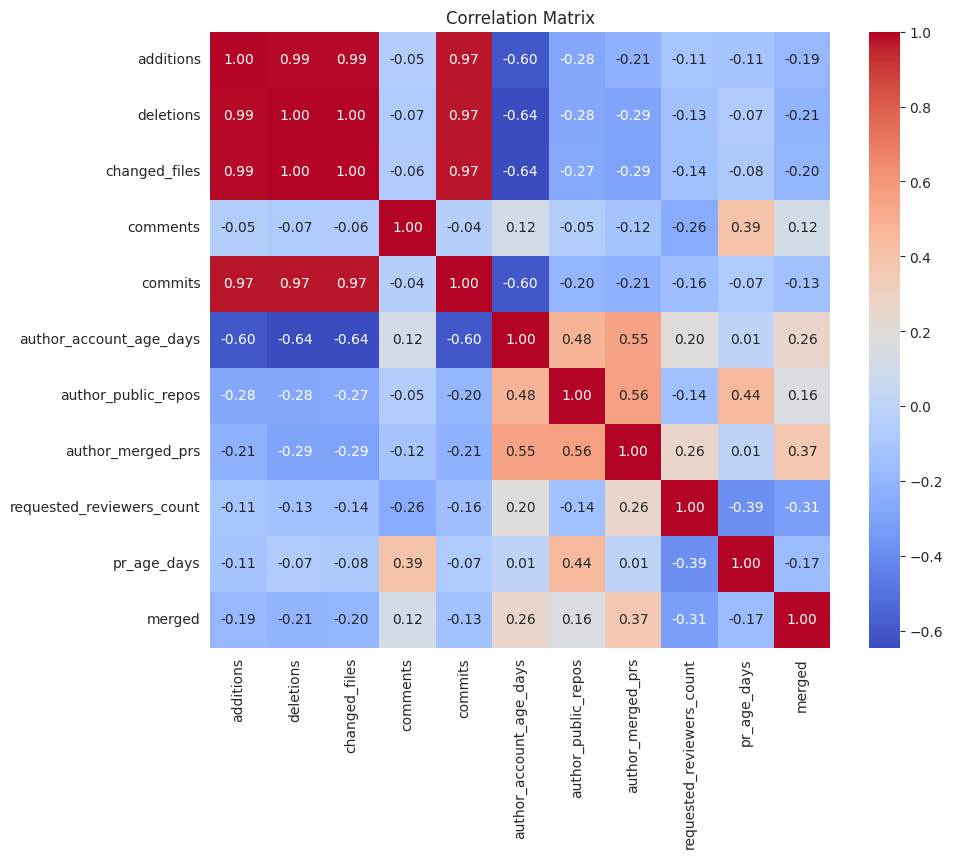

In [12]:
# Correlation matrix for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols + ["merged"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


=== Text Feature Exploration ===


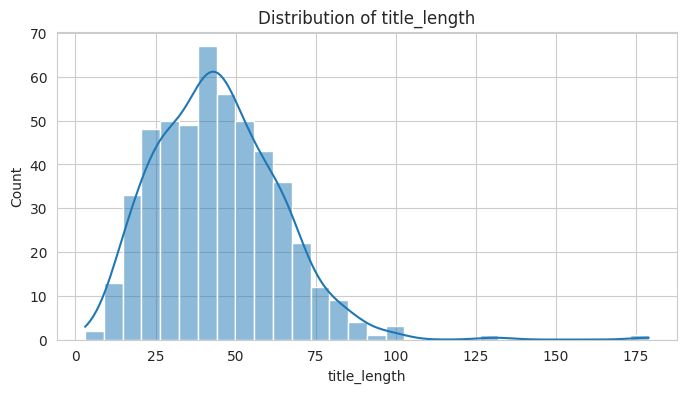

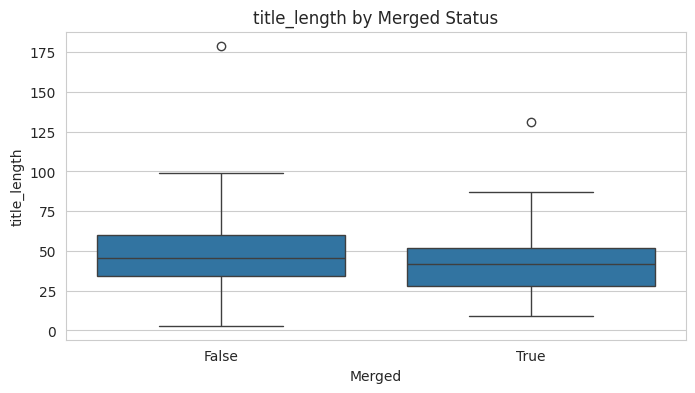

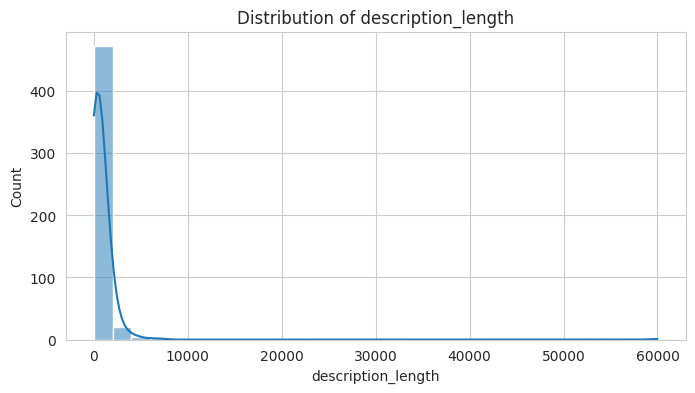

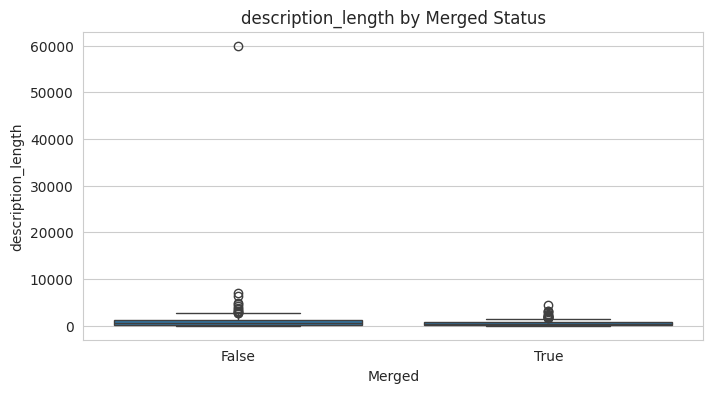

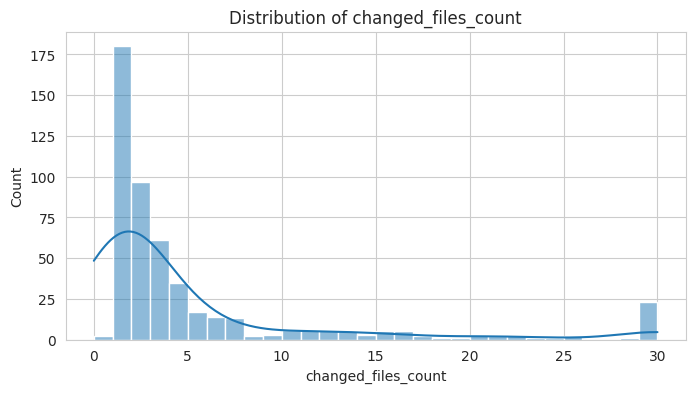

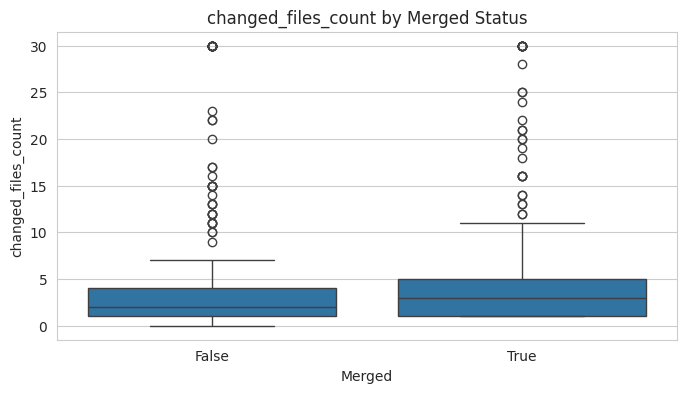

In [12]:
# 6. Text Feature Exploration
print("\n=== Text Feature Exploration ===")
# Add length columns
data["changed_files_count"] = data["changed_files_list"].str.split(",").str.len().fillna(0)

text_cols = ["title_length", "description_length", "changed_files_count"]
for col in text_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="merged", y=col, data=data)
    plt.title(f"{col} by Merged Status")
    plt.xlabel("Merged")
    plt.ylabel(col)
    plt.show()